<a href="https://colab.research.google.com/github/AnatoliiNovyk/math_hw/blob/main/%D0%94%D0%9710_%D0%9D%D0%9E%D0%92%D0%98%D0%9A_%D0%90%D0%9D%D0%90%D0%A2%D0%9E%D0%9B%D0%86%D0%99_%D0%92%D0%9E%D0%9B%D0%9E%D0%94%D0%98%D0%9C%D0%98%D0%A0%D0%9E%D0%92%D0%98%D0%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Фінальний проект: Аналіз та прогнозування орендної плати

**Мета проекту:** Проаналізувати фактори, що впливають на вартість оренди житла, та побудувати моделі машинного навчання для прогнозування орендної плати.

## Етапи проекту:

**1. Імпорт необхідних бібліотек.** \\

**2. Завантаження даних.** \\

**3. Попередній аналіз даних (EDA).** \\

**4. Обробка даних та інженерія ознак.** \\

**5. Побудова та оцінка моделей машинного навчання.** \\

**6. Візуалізація та інтерпретація результатів.** \\

**7. Аналіз важливості ознак.** \\

**8. Обговорення та аналіз помилок.** \\

**9. Висновки.**

## 1. Імпорт необхідних бібліотек


**На цьому етапі ми завантажуємо всі бібліотеки, які знадобляться для аналізу даних, візуалізації та побудови моделей машинного навчання.**

In [38]:
# Для роботи з даними
import pandas as pd
import numpy as np

# Для візуалізації
import matplotlib.pyplot as plt
import seaborn as sns

# Для машинного навчання
from sklearn.model_selection import train_test_split, cross_val_score # Розбиття даних, крос-валідація
from sklearn.linear_model import LinearRegression # Лінійна регресія
from sklearn.tree import DecisionTreeRegressor # Дерево рішень
from sklearn.ensemble import RandomForestRegressor # Випадковий ліс
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Масштабування, кодування
from sklearn.compose import ColumnTransformer # Трансформатор для стовпців
from sklearn.pipeline import Pipeline # Створення пайплайнів
from sklearn.impute import SimpleImputer # Заповнення пропущених значень
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Метрики оцінки

# Для обробки тексту (регулярні вирази)
import re

# Для статистичних тестів
from scipy import stats

# Налаштування стилів для візуалізації для кращого вигляду графіків
plt.style.use('seaborn-v0_8-whitegrid') # Використання стилю seaborn
sns.set_palette("viridis") # Встановлення палітри кольорів

print("Усі необхідні бібліотеки успішно імпортовано!")

Усі необхідні бібліотеки успішно імпортовано!


## 2. Завантаження даних

**Завантажуємо датасет `House_Rent_Prediction - House_Rent_Dataset.csv`.**

In [39]:
file_path = '/content/drive/MyDrive/GOIT/dataset/House_Rent_Prediction - House_Rent_Dataset.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Файл '{file_path}' успішно завантажено.")
    print(f"Розмір датасету: {df.shape[0]} рядків та {df.shape[1]} стовпців.")
except FileNotFoundError:
    print(f"Помилка: Файл '{file_path}' не знайдено.")
    print("Будь ласка, перевірте шлях до файлу або завантажте його в середовище Colab.")

Файл '/content/drive/MyDrive/GOIT/dataset/House_Rent_Prediction - House_Rent_Dataset.csv' успішно завантажено.
Розмір датасету: 4746 рядків та 12 стовпців.


## 3. Попередній аналіз даних (Exploratory Data Analysis - EDA)

**На цьому етапі ми детально вивчаємо дані, щоб зрозуміти їх структуру, типи, наявність пропусків, розподіли ознак та взаємозв'язки між ними. Це допоможе нам сформулювати гіпотези та визначити стратегії для подальшої обробки даних та моделювання.**

### 3.1 Загальний огляд даних

In [40]:
if 'df' in locals(): # Перевіряємо, чи датафрейм `df` існує (тобто чи дані були завантажені)
    print("--- Загальна інформація про датасет ---")
    df.info() # Виводимо інформацію про типи даних, кількість непустих значень

    print("\n--- Перші 5 рядків датасету ---")
    display(df.head()) # Використовуємо display() для кращого форматування в Colab

    print("\n--- Статистичний опис числових ознак ---")
    display(df.describe().T) # .T для транспонування таблиці для кращої читабельності

    print("\n--- Кількість унікальних значень для категоріальних (object) ознак ---")
    for col in df.select_dtypes(include='object').columns:
        print(f"- Ознака '{col}': {df[col].nunique()} унікальних значень")

    print("\n--- Перевірка наявності пропущених значень ---")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0] # Показуємо тільки стовпці з пропусками
    if not missing_values.empty:
        print("Знайдено пропущені значення в наступних стовпцях:")
        print(missing_values)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_values.index, y=missing_values.values, palette="rocket")
        plt.title('Кількість пропущених значень за ознаками')
        plt.xlabel('Ознаки')
        plt.ylabel('Кількість пропусків')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Пропущених значень не знайдено.")
else:
    print("Датафрейм 'df' не завантажено. Будь ласка, виконайте попередню комірку для завантаження даних.")

--- Загальна інформація про датасет ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB

--- Перші 5 рядків датасету ---


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner



--- Статистичний опис числових ознак ---


,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0



--- Кількість унікальних значень для категоріальних (object) ознак ---
- Ознака 'Posted On': 81 унікальних значень
- Ознака 'Floor': 480 унікальних значень
- Ознака 'Area Type': 3 унікальних значень
- Ознака 'Area Locality': 2235 унікальних значень
- Ознака 'City': 6 унікальних значень
- Ознака 'Furnishing Status': 3 унікальних значень
- Ознака 'Tenant Preferred': 3 унікальних значень
- Ознака 'Point of Contact': 3 унікальних значень

--- Перевірка наявності пропущених значень ---
Пропущених значень не знайдено.


### 3.2 Аналіз цільової змінної (`Rent`)

**Цільовою змінною в нашому завданні є `Rent` (орендна плата). Важливо дослідити її розподіл, оскільки це може вплинути на вибір моделі та методи попередньої обробки. Часто цінові показники мають асиметричний розподіл, який можна нормалізувати за допомогою логарифмічного перетворення.**

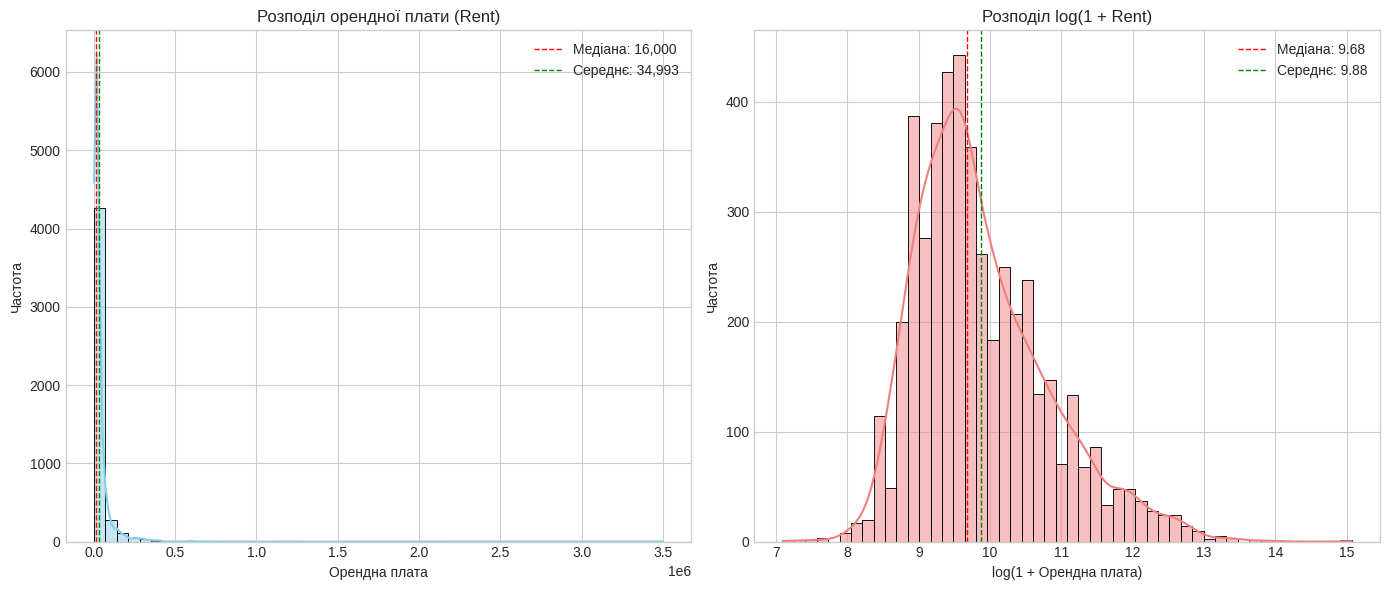


--- Статистичний тест на нормальність для Rent_log ---
Тест Шапіро-Уілка для Rent_log: Статистика=0.949, p-value=1.16e-37
Висновок: Rent_log, ймовірно, не розподілена нормально (відхиляємо H0).

Коментар: Логарифмування допомогло зробити розподіл більш симетричним, що є корисним для багатьох моделей регресії.


In [41]:
if 'df' in locals():
    plt.figure(figsize=(14, 6))

    # Розподіл оригінальної цільової змінної 'Rent'
    plt.subplot(1, 2, 1)
    sns.histplot(df['Rent'], kde=True, bins=50, color='skyblue')
    plt.title('Розподіл орендної плати (Rent)')
    plt.xlabel('Орендна плата')
    plt.ylabel('Частота')
    median_rent = df['Rent'].median()
    mean_rent = df['Rent'].mean()
    plt.axvline(median_rent, color='red', linestyle='dashed', linewidth=1, label=f'Медіана: {median_rent:,.0f}')
    plt.axvline(mean_rent, color='green', linestyle='dashed', linewidth=1, label=f'Середнє: {mean_rent:,.0f}')
    plt.legend()

    # Логарифмічне перетворення цільової змінної для нормалізації розподілу
    # Використовуємо np.log1p для уникнення проблем з нульовими значеннями (log(0) не визначено)
    # log1p(x) = log(1+x)
    df['Rent_log'] = np.log1p(df['Rent'])

    # Розподіл логарифмованої цільової змінної 'Rent_log'
    plt.subplot(1, 2, 2)
    sns.histplot(df['Rent_log'], kde=True, bins=50, color='lightcoral')
    plt.title('Розподіл log(1 + Rent)')
    plt.xlabel('log(1 + Орендна плата)')
    plt.ylabel('Частота')
    median_rent_log = df['Rent_log'].median()
    mean_rent_log = df['Rent_log'].mean()
    plt.axvline(median_rent_log, color='red', linestyle='dashed', linewidth=1, label=f'Медіана: {median_rent_log:.2f}')
    plt.axvline(mean_rent_log, color='green', linestyle='dashed', linewidth=1, label=f'Середнє: {mean_rent_log:.2f}')
    plt.legend()

    plt.tight_layout() # Автоматичне налаштування проміжків між графіками
    plt.show()

    # Статистичні тести на нормальність для Rent_log
    # Тест Шапіро-Уілка: H0 - дані розподілені нормально.
    # Якщо p-value > 0.05, ми не відхиляємо H0.
    print("\n--- Статистичний тест на нормальність для Rent_log ---")
    # Тест Шапіро-Уілка має обмеження на розмір вибірки (зазвичай до 5000 значень в scipy)
    if 3 <= len(df['Rent_log']) <= 5000:
        stat_rent_log, p_rent_log = stats.shapiro(df['Rent_log'])
        print(f'Тест Шапіро-Уілка для Rent_log: Статистика={stat_rent_log:.3f}, p-value={p_rent_log:.3g}')
        if p_rent_log > 0.05:
            print('Висновок: Rent_log, ймовірно, розподілена нормально (не відхиляємо H0).')
        else:
            print('Висновок: Rent_log, ймовірно, не розподілена нормально (відхиляємо H0).')
    else:
        print(f"Розмір вибірки Rent_log ({len(df['Rent_log'])}) не підходить для тесту Шапіро-Уілка в scipy.stats (потрібно від 3 до 5000).")
        print("Розглянемо тест Д'Агостіно K^2, який краще підходить для більших вибірок.")
        stat_dagostino, p_dagostino = stats.normaltest(df['Rent_log'])
        print(f"Тест Д'Агостіно K^2 для Rent_log: Статистика={stat_dagostino:.3f}, p-value={p_dagostino:.3g}")
        if p_dagostino > 0.05:
            print('Висновок (Д\'Агостіно): Rent_log, ймовірно, розподілена нормально (не відхиляємо H0).')
        else:
            print('Висновок (Д\'Агостіно): Rent_log, ймовірно, не розподілена нормально (відхиляємо H0).')

    print("\nКоментар: Логарифмування допомогло зробити розподіл більш симетричним, що є корисним для багатьох моделей регресії.")
else:
    print("Датафрейм 'df' не завантажено.")

### 3.3 Аналіз числових ознак

**Досліджуємо розподіли числових ознак та їх кореляції між собою та з цільовою змінною.**


--- Розподіл числових ознак ---


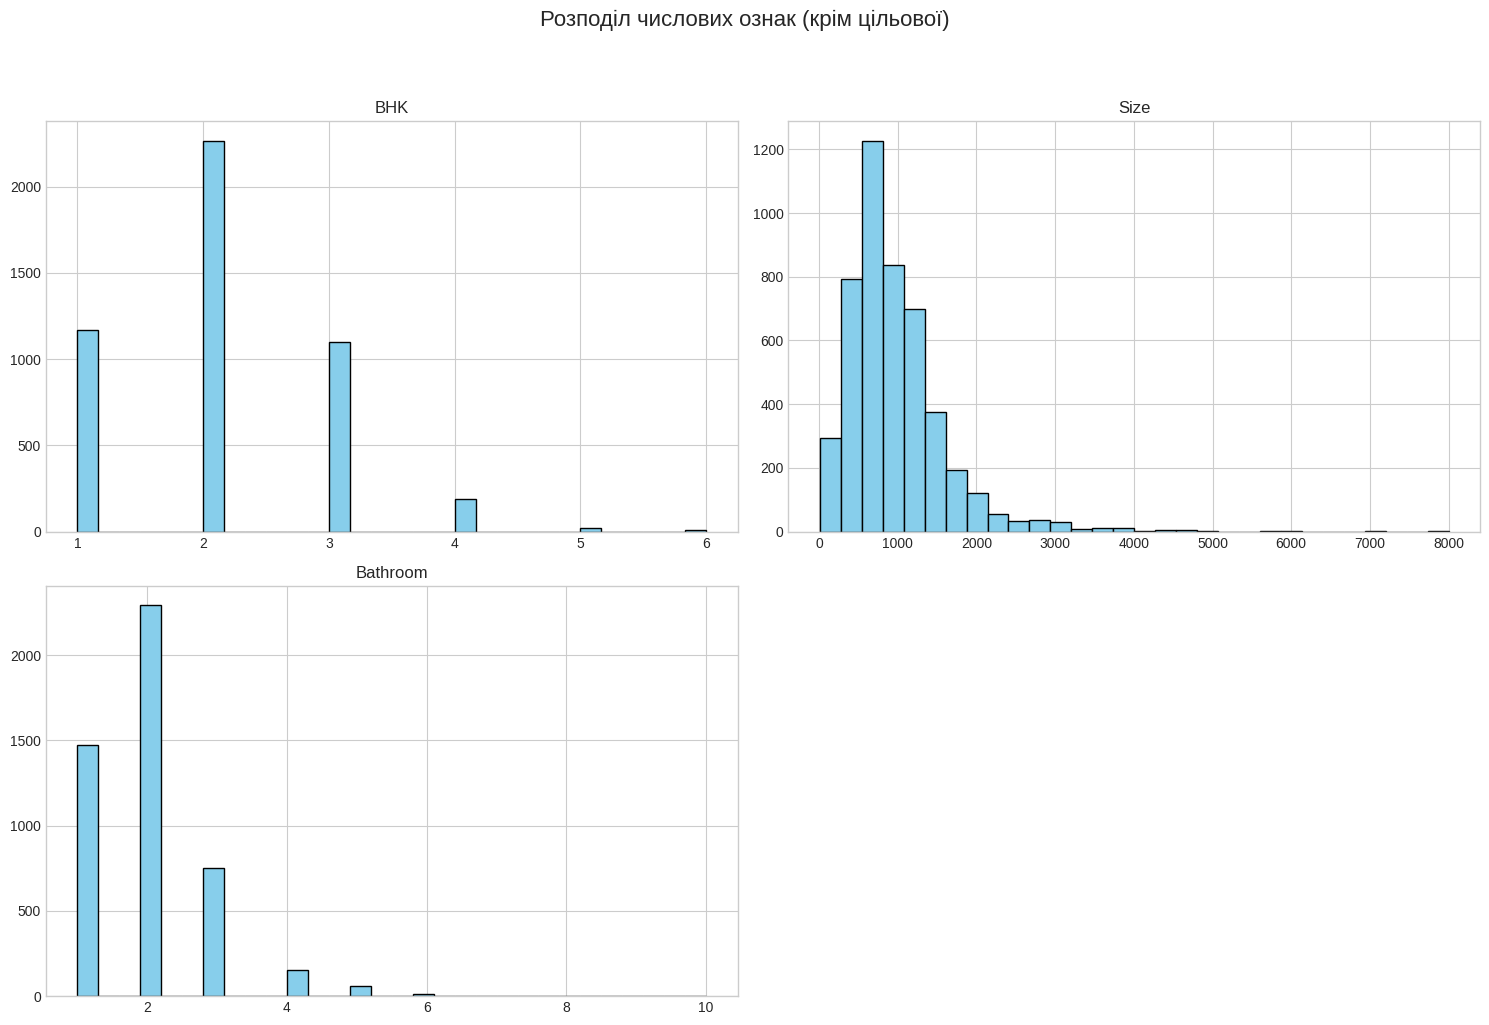


--- Кореляційна матриця числових ознак (включаючи Rent_log) ---


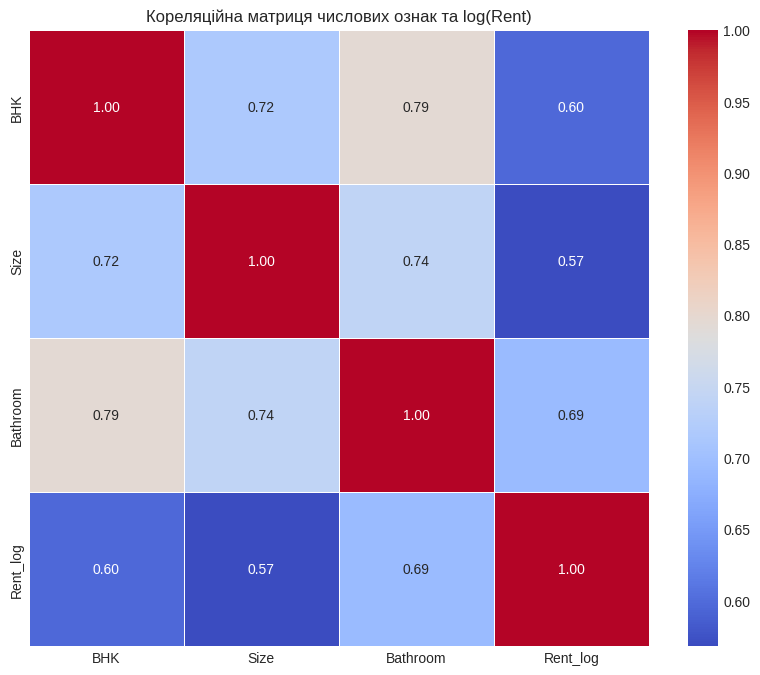


Коментарі до кореляцій:
- Очікується, що 'Size', 'BHK', 'Bathroom' матимуть позитивну кореляцію з 'Rent_log'.
- Сильна кореляція між предикторами (наприклад, 'BHK' та 'Bathroom' або 'Size') може вказувати на мультиколінеарність, яку варто враховувати.


In [42]:
if 'df' in locals():
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    # Виключаємо 'Rent' (оригінальну цільову) та 'Rent_log' (трансформовану цільову) з візуалізації їх розподілу,
    # оскільки 'Rent_log' вже проаналізована, а 'Rent' має сильний перекіс.
    # 'Posted On' також може бути числовим, якщо це дата, але ми її обробимо окремо або виключимо.
    # Для цього аналізу ми зосередимося на ознаках, які безпосередньо описують характеристики житла.
    numerical_features_for_eda = [col for col in numerical_cols if col not in ['Rent', 'Rent_log', 'Posted On']] # 'Posted On' може бути датою, яку ми не аналізуємо як число тут

    if numerical_features_for_eda:
        print("\n--- Розподіл числових ознак ---")
        df[numerical_features_for_eda].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
        plt.suptitle('Розподіл числових ознак (крім цільової)', y=1.02, fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.98]) # Залишаємо місце для suptitle
        plt.show()

        print("\n--- Кореляційна матриця числових ознак (включаючи Rent_log) ---")
        # Включаємо Rent_log для аналізу кореляції з іншими числовими ознаками
        correlation_matrix = df[numerical_features_for_eda + ['Rent_log']].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Кореляційна матриця числових ознак та log(Rent)')
        plt.show()

        print("\nКоментарі до кореляцій:")
        print("- Очікується, що 'Size', 'BHK', 'Bathroom' матимуть позитивну кореляцію з 'Rent_log'.")
        print("- Сильна кореляція між предикторами (наприклад, 'BHK' та 'Bathroom' або 'Size') може вказувати на мультиколінеарність, яку варто враховувати.")
    else:
        print("Не знайдено числових ознак для аналізу (крім цільової).")
else:
    print("Датафрейм 'df' не завантажено.")

### 3.4 Аналіз категоріальних ознак

**Досліджуємо розподіли категоріальних ознак та їх зв'язок з цільовою змінною `Rent_log`.**


--- Розподіл категоріальних ознак ---


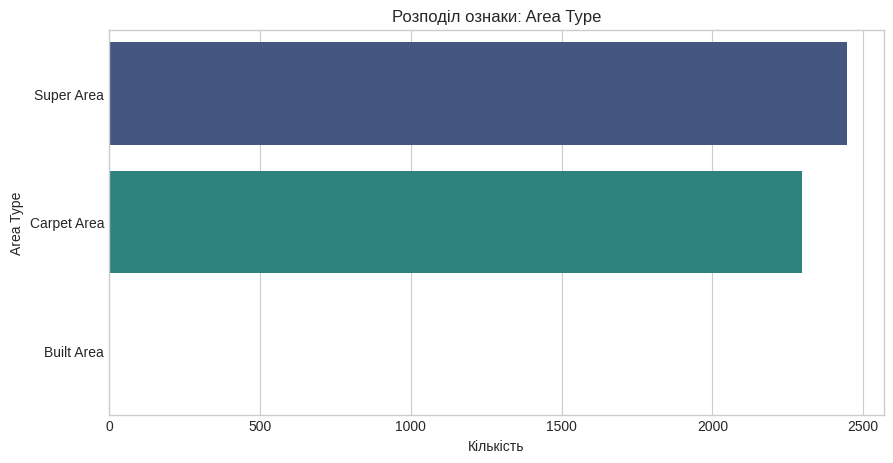

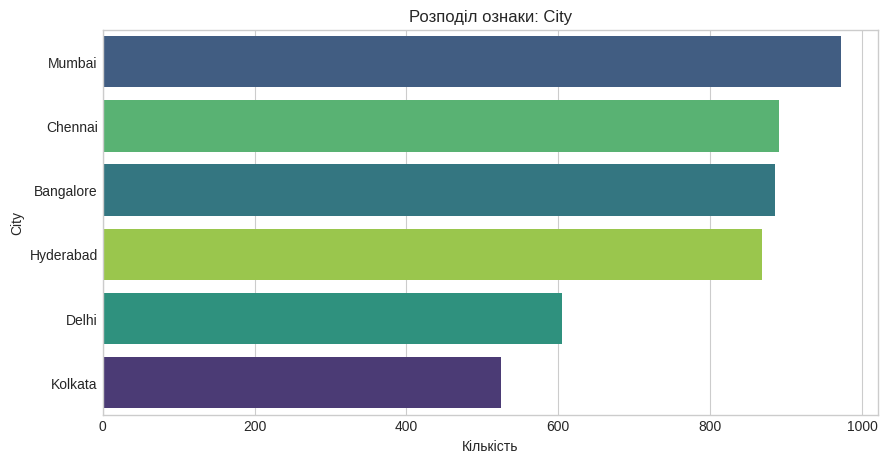

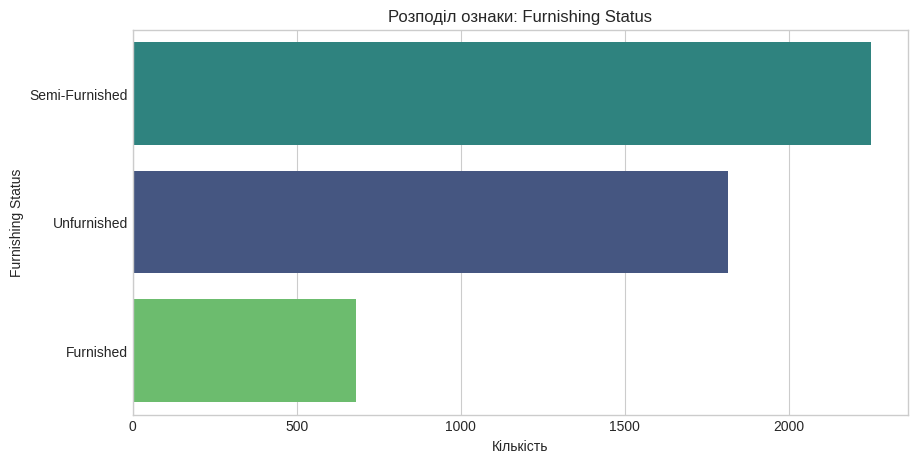

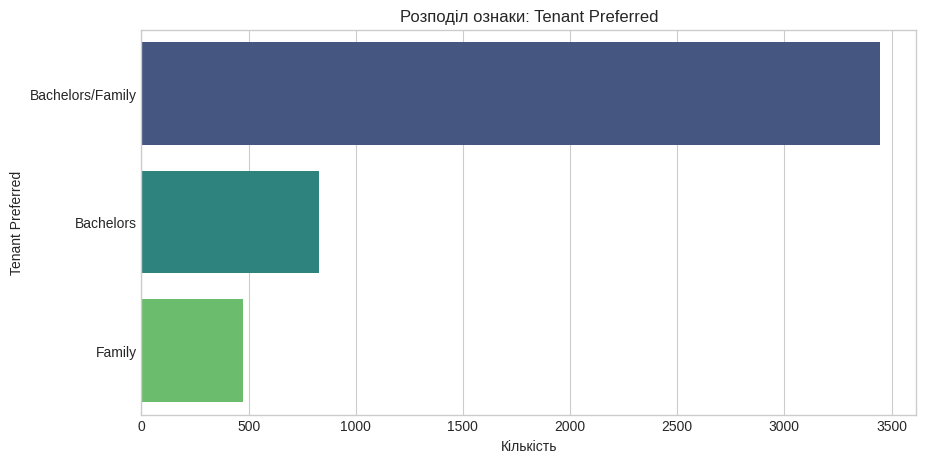


--- Зв'язок категоріальних ознак з Rent_log (Box Plots) ---


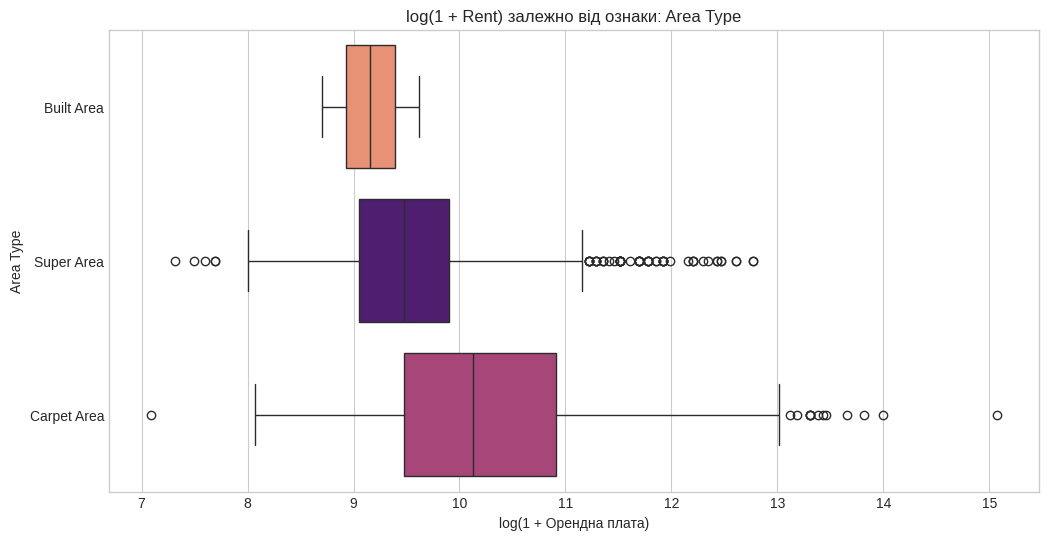

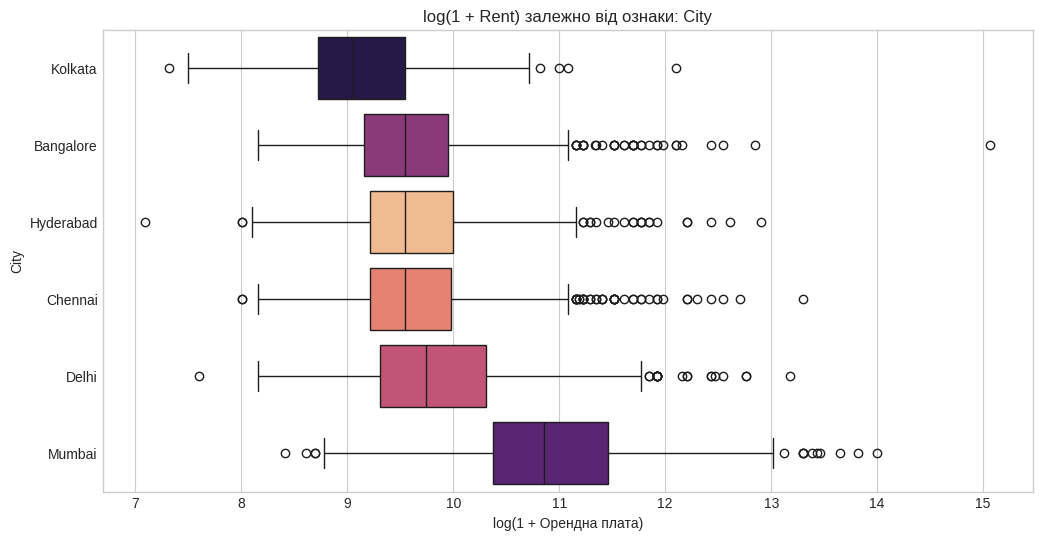

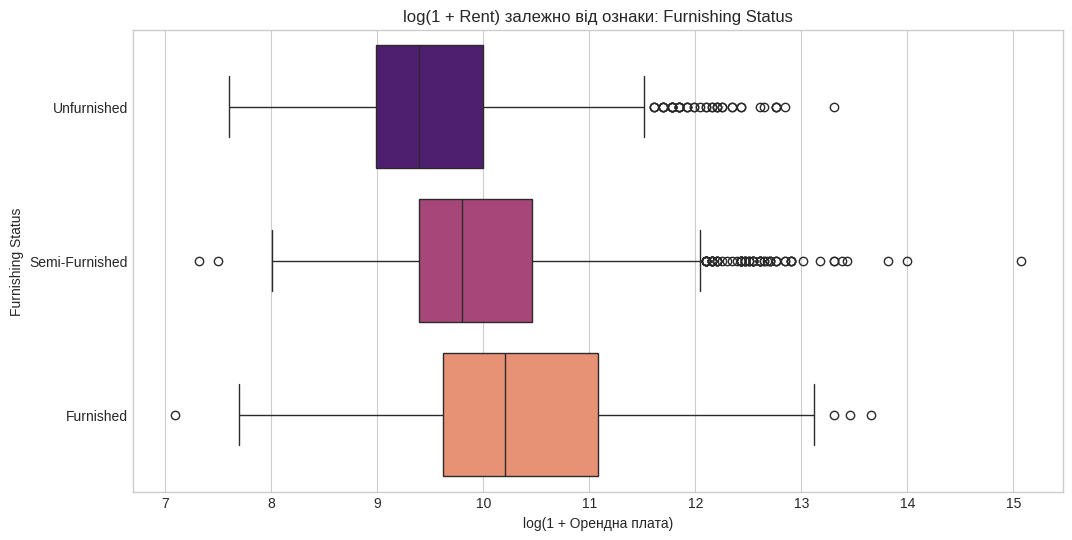

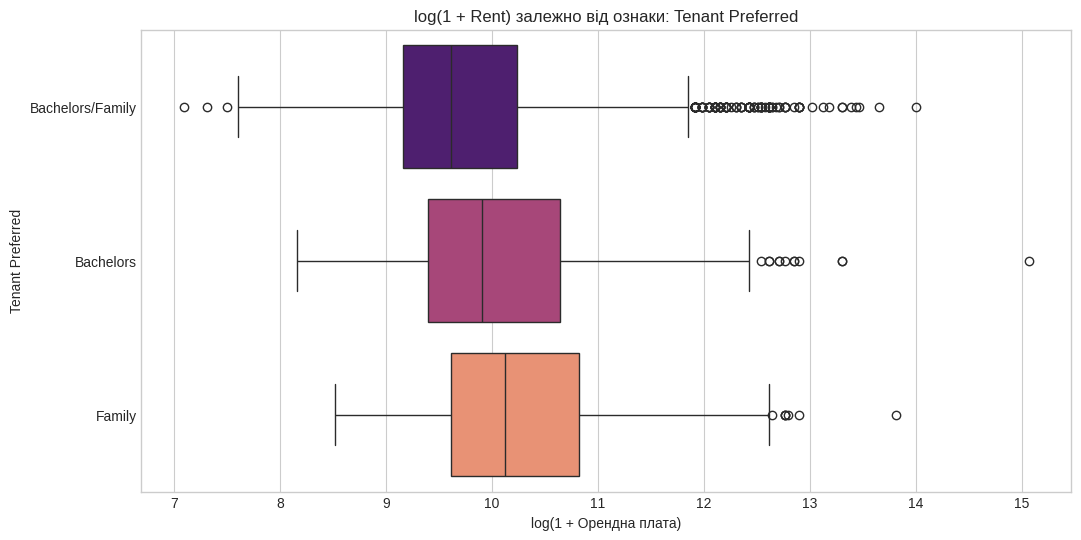


Коментар: Діаграми розмаху (Box Plots) допомагають побачити, як змінюється орендна плата залежно від різних категорій.
Наприклад, можна очікувати, що 'Furnished' квартири матимуть вищу орендну плату, ніж 'Unfurnished'.


In [43]:
if 'df' in locals():
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    # Виключаємо ознаки з дуже великою кількістю унікальних значень для початкового EDA,
    # такі як 'Posted On' (дата), 'Floor' (потребує парсингу), 'Area Locality' (багато унікальних локацій),
    # 'Point of Contact' (може бути менш релевантним або мати багато варіацій).
    categorical_cols_for_eda = [
        col for col in categorical_cols
        if col not in ['Posted On', 'Floor', 'Area Locality', 'Point of Contact'] and df[col].nunique() < 30 # Обмеження для читабельності графіків
    ]

    if categorical_cols_for_eda:
        print("\n--- Розподіл категоріальних ознак ---")
        for col in categorical_cols_for_eda:
            plt.figure(figsize=(10, 5))
            sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis', hue=col, legend=False)
            plt.title(f'Розподіл ознаки: {col}')
            plt.xlabel('Кількість')
            plt.ylabel(col)
            plt.show()

        print("\n--- Зв'язок категоріальних ознак з Rent_log (Box Plots) ---")
        for col in categorical_cols_for_eda:
            plt.figure(figsize=(12, 6))
            # Сортування категорій за медіанним значенням Rent_log для кращої візуалізації
            order = df.groupby(col)['Rent_log'].median().sort_values().index
            sns.boxplot(data=df, x='Rent_log', y=col, order=order, palette='magma', hue=col, legend=False)
            plt.title(f'log(1 + Rent) залежно від ознаки: {col}')
            plt.xlabel('log(1 + Орендна плата)')
            plt.ylabel(col)
            plt.show()
        print("\nКоментар: Діаграми розмаху (Box Plots) допомагають побачити, як змінюється орендна плата залежно від різних категорій.")
        print("Наприклад, можна очікувати, що 'Furnished' квартири матимуть вищу орендну плату, ніж 'Unfurnished'.")
    else:
        print("Не знайдено підходящих категоріальних ознак для цього етапу EDA (з малою кількістю унікальних значень).")
else:
    print("Датафрейм 'df' не завантажено.")

## 4. Обробка даних та інженерія ознак (Feature Engineering)

## На цьому етапі ми готуємо дані для моделювання:

*   Обробляємо специфічні ознаки (наприклад, $'Floor'$).
*   Створюємо нові ознаки, якщо це доцільно.
*   Визначаємо набір ознак $(X)$ та цільову змінну $(y)$.
*   Розбиваємо дані на тренувальний та тестовий набори.
*   Пропуски та кодування категоріальних ознак будуть оброблені пізніше за допомогою пайплайнів.

In [44]:
if 'df' in locals():
    print("--- Обробка ознаки 'Floor' ---")
    # Функція для вилучення інформації про поверх та загальну кількість поверхів
    # Ця функція була взята з наданого скрипту dz10.py
    def extract_floor_info(floor_str):
        floor_str = str(floor_str).lower() # Переводимо в нижній регістр
        specific_floor_numeric = np.nan # Ініціалізуємо як NaN
        total_floors = np.nan # Ініціалізуємо як NaN

        # Шукаємо загальну кількість поверхів (наприклад, "out of 10")
        total_floors_match = re.search(r'out of (\d+)', floor_str)
        if total_floors_match:
            total_floors = int(total_floors_match.group(1))

        # Визначаємо конкретний поверх
        if 'ground' in floor_str:
            specific_floor_numeric = 0 # Перший поверх (ground floor)
        elif 'upper basement' in floor_str:
            specific_floor_numeric = -1 # Верхній підвал
        elif 'lower basement' in floor_str:
            specific_floor_numeric = -2 # Нижній підвал
        else:
            # Шукаємо число на початку рядка (наприклад, "1st", "2nd", "10th")
            specific_floor_match = re.match(r'^(\d+)', floor_str)
            if specific_floor_match:
                specific_floor_numeric = int(specific_floor_match.group(1))
                # Якщо загальна кількість поверхів не вказана явно через "out of",
                # і це не підвал/перший поверх, припускаємо, що це останній поверх, якщо він єдиний вказаний.
                # Це припущення може бути не завжди точним, але є спробою витягти максимум інформації.
                if pd.isna(total_floors) and 'out of' not in floor_str:
                    if specific_floor_numeric > 0: # Припускаємо, що поверхи нумеруються з 1 (крім ground)
                        total_floors = specific_floor_numeric # Якщо квартира на 5 поверсі і немає "out of X", то будинок має щонайменше 5 поверхів.

        return specific_floor_numeric, total_floors

    # Застосування функції та створення нових стовпців
    df[['Specific_Floor', 'Total_Floors']] = df['Floor'].apply(lambda x: pd.Series(extract_floor_info(x)))

    print("Створено нові ознаки: 'Specific_Floor' та 'Total_Floors'.")
    print("Пропуски у нових ознаках 'Specific_Floor' та 'Total_Floors' (будуть оброблені пізніше):")
    print(df[['Specific_Floor', 'Total_Floors']].isnull().sum())
    display(df[['Floor', 'Specific_Floor', 'Total_Floors']].head())

    # --- Визначення ознак для моделювання ---
    # Стовпці, які потрібно виключити з моделі:
    # 'Posted On': Дата публікації, її обробка вимагає окремого підходу (наприклад, виділення місяця, дня тижня),
    #              або її можна виключити, якщо не очікується сильного впливу на ціну в рамках цього датасету.
    # 'Rent': Оригінальна цільова змінна (використовуємо 'Rent_log').
    # 'Floor': Оригінальний стовпець поверху, замінений на 'Specific_Floor' та 'Total_Floors'.
    # 'Area Locality': Має дуже багато унікальних значень, що ускладнить OneHotEncoding.
    #                  Для спрощення моделі на даному етапі виключаємо. Можна розглянути Target Encoding або агрегацію.
    # 'Point of Contact': Ймовірно, не має прямого впливу на ціну оренди.
    cols_to_drop_for_model = ['Posted On', 'Rent', 'Floor', 'Area Locality', 'Point of Contact']

    # Перевіряємо, чи всі стовпці для видалення існують в датафреймі
    existing_cols_to_drop = [col for col in cols_to_drop_for_model if col in df.columns]
    X = df.drop(columns=existing_cols_to_drop + ['Rent_log']) # Виключаємо також цільову змінну 'Rent_log' з ознак
    y = df['Rent_log'] # Наша цільова змінна

    print(f"\nРозмір X (ознаки): {X.shape}")
    print(f"Розмір y (цільова змінна): {y.shape}")

    # --- Визначення числових та категоріальних ознак для пайплайну ---
    numerical_features_for_pipeline = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features_for_pipeline = X.select_dtypes(include='object').columns.tolist()

    print(f"\nЧислові ознаки для пайплайну ({len(numerical_features_for_pipeline)}): {numerical_features_for_pipeline}")
    print(f"Категоріальні ознаки для пайплайну ({len(categorical_features_for_pipeline)}): {categorical_features_for_pipeline}")

    # --- Розбиття даних на тренувальний та тестовий набори ---
    # test_size=0.2 означає, що 20% даних піде в тестовий набір, а 80% - в тренувальний.
    # random_state=42 забезпечує відтворюваність результатів розбиття.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nРозмір тренувального набору X_train: {X_train.shape}")
    print(f"Розмір тестового набору X_test: {X_test.shape}")
    print(f"Розмір тренувального набору y_train: {y_train.shape}")
    print(f"Розмір тестового набору y_test: {y_test.shape}")

else:
    print("Датафрейм 'df' не завантажено. Неможливо виконати обробку даних.")

--- Обробка ознаки 'Floor' ---
Створено нові ознаки: 'Specific_Floor' та 'Total_Floors'.
Пропуски у нових ознаках 'Specific_Floor' та 'Total_Floors' (будуть оброблені пізніше):
Specific_Floor    0
Total_Floors      1
dtype: int64


,Floor,Specific_Floor,Total_Floors
0,Ground out of 2,0.0,2.0
1,1 out of 3,1.0,3.0
2,1 out of 3,1.0,3.0
3,1 out of 2,1.0,2.0
4,1 out of 2,1.0,2.0



Розмір X (ознаки): (4746, 9)
Розмір y (цільова змінна): (4746,)

Числові ознаки для пайплайну (5): ['BHK', 'Size', 'Bathroom', 'Specific_Floor', 'Total_Floors']
Категоріальні ознаки для пайплайну (4): ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']

Розмір тренувального набору X_train: (3796, 9)
Розмір тестового набору X_test: (950, 9)
Розмір тренувального набору y_train: (3796,)
Розмір тестового набору y_test: (950,)


## 5. Побудова та оцінка моделей машинного навчання

### На цьому етапі ми:
1.  Створюємо пайплайни для попередньої обробки числових та категоріальних ознак. Це включає:
     * **Для числових ознак:** Заповнення пропущених значень (імпутація) медіаною та масштабування (стандартизація). \\
     * **Для категоріальних ознак:** Заповнення пропущених значень найчастішим значенням та кодування за допомогою One-Hot Encoding. \\
2.  Визначаємо декілька моделей регресії: Лінійна регресія, Дерево рішень, Випадковий ліс.
3.  Навчаємо кожну модель на тренувальних даних, використовуючи крос-валідацію для оцінки її узагальнюючої здатності.
4.  Оцінюємо продуктивність моделей на тестовому наборі за допомогою метрик: MAE, MSE, RMSE та R².

In [45]:
if 'X_train' in locals(): # Перевіряємо, чи дані були підготовлені
    # --- Пайплайни для препроцесингу ---

    # Пайплайн для числових ознак:
    # 1. SimpleImputer: Заповнює пропущені значення. Стратегія 'median' стійка до викидів.
    # 2. StandardScaler: Масштабує ознаки, приводячи їх до нульового середнього та одиничної дисперсії.
    #    Це важливо для моделей, чутливих до масштабу ознак (наприклад, лінійна регресія, SVM).
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Пайплайн для категоріальних ознак:
    # 1. SimpleImputer: Заповнює пропущені значення найчастішим значенням (mode).
    # 2. OneHotEncoder: Перетворює категоріальні ознаки на набір бінарних (0/1) стовпців.
    #    handle_unknown='ignore': Ігнорує невідомі категорії в тестових даних (присвоює їм нулі у всіх нових стовпцях).
    #    drop='first': Видаляє перший стовпець з утворених після кодування, щоб уникнути мультиколінеарності (dummy variable trap).
    #    sparse_output=False: Повертає щільний масив (numpy array) замість розрідженої матриці.
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
    ])

    # Комбінований препроцесор за допомогою ColumnTransformer:
    # Застосовує відповідний пайплайн до відповідних типів стовпців.
    # remainder='drop': Видаляє стовпці, які не були явно вказані в transformers (якщо такі є).
    #                 У нашому випадку всі стовпці або числові, або категоріальні, тому нічого не повинно видалятися,
    #                 якщо numerical_features_for_pipeline та categorical_features_for_pipeline охоплюють всі стовпці X.
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, numerical_features_for_pipeline),
            ('cat', categorical_pipeline, categorical_features_for_pipeline)
        ],
        remainder='passthrough' # 'passthrough' залишає стовпці, які не були оброблені, без змін.
                                # Якщо всі стовпці обробляються, це не матиме ефекту.
                                # Використання 'drop' є безпечнішим, якщо ви впевнені, що всі потрібні стовпці вказані.
    )
    print("Створено пайплайни для препроцесингу числових та категоріальних ознак.")

    # --- Визначення моделей ---
    # Ми розглянемо три популярні моделі регресії.
    # Параметри для DecisionTreeRegressor та RandomForestRegressor підібрані для запобігання перенавчанню
    # та можуть бути оптимізовані за допомогою GridSearchCV або RandomizedSearchCV.
    models = {
        "Лінійна регресія": LinearRegression(),
        "Дерево рішень": DecisionTreeRegressor(
            random_state=42,
            max_depth=10,          # Максимальна глибина дерева
            min_samples_split=20,  # Мінімальна кількість зразків для розбиття вузла
            min_samples_leaf=10    # Мінімальна кількість зразків у листковому вузлі
        ),
        "Випадковий ліс": RandomForestRegressor(
            random_state=42,
            n_estimators=100,      # Кількість дерев у лісі
            max_depth=15,
            min_samples_split=10,
            min_samples_leaf=5,
            n_jobs=-1              # Використовувати всі доступні ядра процесора
        )
    }
    print(f"\nВизначено {len(models)} моделей для навчання: {', '.join(models.keys())}.")

    # --- Навчання та оцінка моделей ---
    results = {} # Словник для зберігання результатів кожної моделі
    trained_pipelines = {} # Словник для зберігання навчених пайплайнів

    # Перетворення y_test назад до оригінальної шкали для оцінки (оскільки y_train/y_test логарифмовані)
    # np.expm1(x) = exp(x) - 1, що є оберненою операцією до np.log1p(y) = log(1+y)
    y_test_orig = np.expm1(y_test)

    # Функція для оцінки моделі та виведення метрик
    def evaluate_model_on_original_scale(y_true_orig, y_pred_orig, model_name):
        mae = mean_absolute_error(y_true_orig, y_pred_orig)
        mse = mean_squared_error(y_true_orig, y_pred_orig)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true_orig, y_pred_orig)
        print(f"  Оцінка на тестових даних (оригінальна шкала 'Rent'):")
        print(f"    MAE (Mean Absolute Error): {mae:,.2f} (середня абсолютна помилка в одиницях Rent)")
        print(f"    MSE (Mean Squared Error):  {mse:,.2f}")
        print(f"    RMSE (Root Mean Squared Error): {rmse:,.2f}")
        print(f"    R² (Коефіцієнт детермінації): {r2:.4f}")
        return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

    for name, model in models.items():
        print(f"\n--- Обробка моделі: {name} ---")

        # Створення повного пайплайну: препроцесор + модель
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])

        # Оцінка за допомогою крос-валідації на тренувальному наборі (на логарифмічній шкалі y_train)
        # scoring='r2': Коефіцієнт детермінації R²
        # scoring='neg_mean_absolute_error': Негативна середня абсолютна помилка (чим ближче до 0, тим краще)
        # cv=5: 5-кратна крос-валідація
        try:
            print("  Проведення крос-валідації на тренувальних даних (логарифмічна шкала 'Rent_log')...")
            cv_scores_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
            print(f"    Середній R2 (крос-валідація): {cv_scores_r2.mean():.4f} +/- {cv_scores_r2.std():.4f}")

            cv_scores_neg_mae = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
            print(f"    Середній MAE (крос-валідація, log-шкала): {-cv_scores_neg_mae.mean():.4f} +/- {-cv_scores_neg_mae.std():.4f}")
        except Exception as e:
            print(f"    Помилка під час крос-валідації для моделі {name}: {e}")

        # Навчання моделі на всьому тренувальному наборі
        print("  Навчання моделі на повному тренувальному наборі...")
        pipeline.fit(X_train, y_train)
        trained_pipelines[name] = pipeline # Зберігаємо навчений пайплайн

        # Прогнозування на тестовому наборі (результат буде на логарифмічній шкалі)
        y_pred_log = pipeline.predict(X_test)

        # Перетворення прогнозів назад до оригінальної шкали 'Rent'
        y_pred_orig = np.expm1(y_pred_log)
        # Запобігання негативним прогнозам, якщо такі виникнуть (малоймовірно з expm1)
        y_pred_orig[y_pred_orig < 0] = 0


        # Оцінка моделі на тестовому наборі (на оригінальній шкалі)
        metrics = evaluate_model_on_original_scale(y_test_orig, y_pred_orig, name)
        results[name] = {
            'metrics_original_scale': metrics,
            'predictions_log': y_pred_log,
            'predictions_original_scale': y_pred_orig,
            'residuals_original_scale': y_test_orig - y_pred_orig # Залишки на оригінальній шкалі
        }
    print("\nУсі моделі навчені та оцінені.")
else:
    print("Дані (X_train, etc.) не підготовлені. Неможливо побудувати та оцінити моделі.")

Створено пайплайни для препроцесингу числових та категоріальних ознак.

Визначено 3 моделей для навчання: Лінійна регресія, Дерево рішень, Випадковий ліс.

--- Обробка моделі: Лінійна регресія ---
  Проведення крос-валідації на тренувальних даних (логарифмічна шкала 'Rent_log')...
    Середній R2 (крос-валідація): 0.7955 +/- 0.0143
    Середній MAE (крос-валідація, log-шкала): 0.3121 +/- -0.0120
  Навчання моделі на повному тренувальному наборі...
  Оцінка на тестових даних (оригінальна шкала 'Rent'):
    MAE (Mean Absolute Error): 11,929.21 (середня абсолютна помилка в одиницях Rent)
    MSE (Mean Squared Error):  1,028,019,732.73
    RMSE (Root Mean Squared Error): 32,062.75
    R² (Коефіцієнт детермінації): 0.7421

--- Обробка моделі: Дерево рішень ---
  Проведення крос-валідації на тренувальних даних (логарифмічна шкала 'Rent_log')...
    Середній R2 (крос-валідація): 0.7676 +/- 0.0159
    Середній MAE (крос-валідація, log-шкала): 0.3318 +/- -0.0090
  Навчання моделі на повному тре

## 6. Результати: Візуалізація та інтерпретація

**Візуалізуємо результати прогнозування найкращих моделей та аналізуємо їхні залишки. Це допоможе зрозуміти, наскільки добре моделі працюють і де вони роблять найбільші помилки.**

--- Візуалізація результатів прогнозування ---

--- Візуалізація для моделі: Лінійна регресія ---


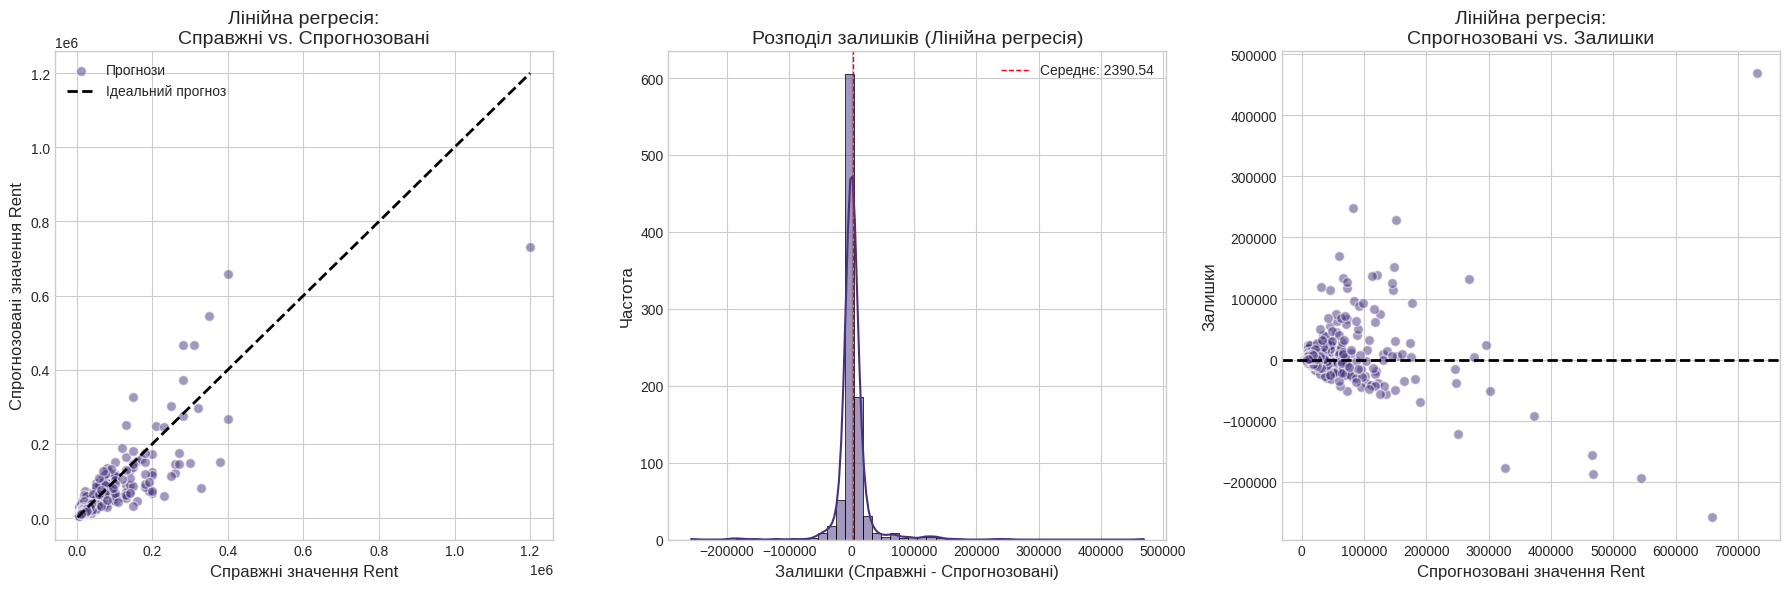


  Тест нормальності залишків для моделі Лінійна регресія (на оригінальній шкалі):
    Тест Шапіро-Уілка: Статистика=0.483, p-value=5.6e-46
    Висновок: Залишки, ймовірно, не розподілені нормально (відхиляємо H0).

--- Візуалізація для моделі: Дерево рішень ---


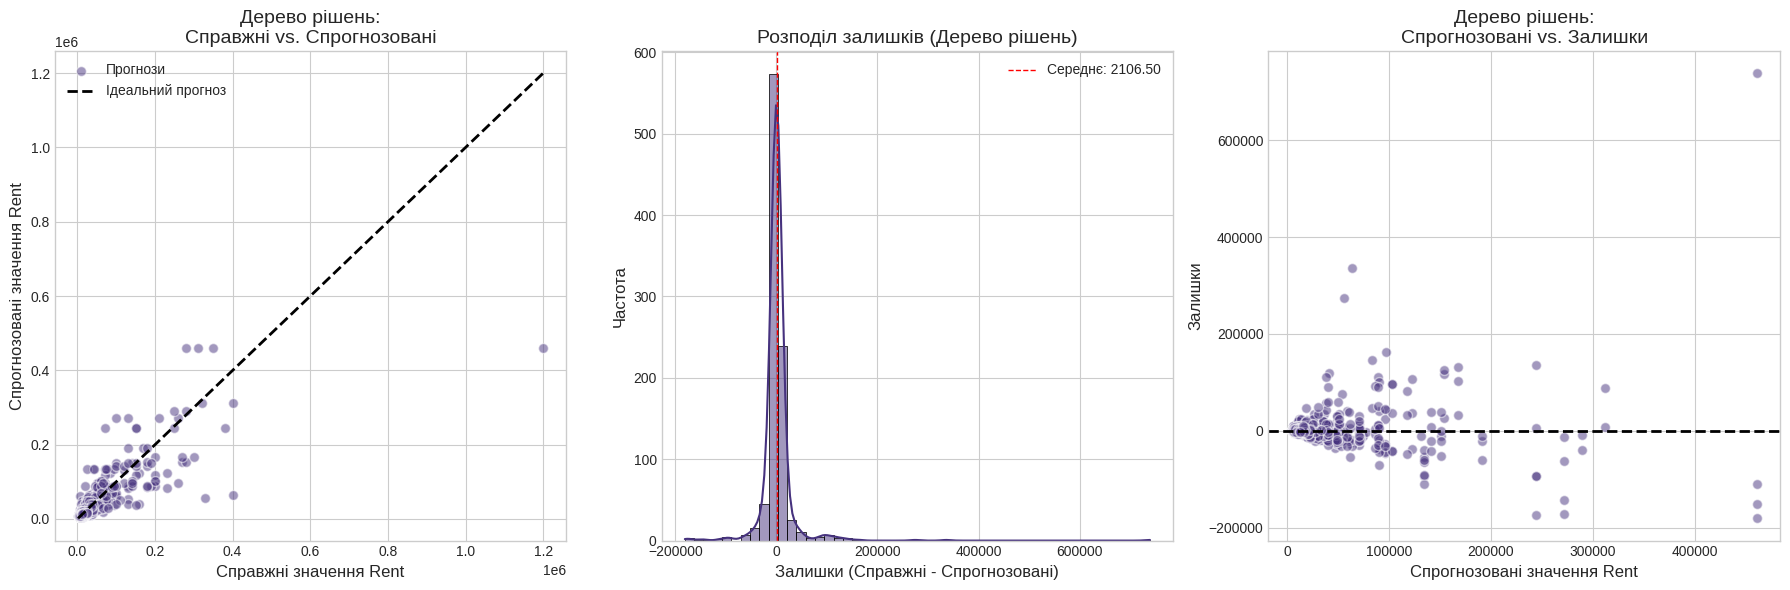


  Тест нормальності залишків для моделі Дерево рішень (на оригінальній шкалі):
    Тест Шапіро-Уілка: Статистика=0.407, p-value=4.25e-48
    Висновок: Залишки, ймовірно, не розподілені нормально (відхиляємо H0).

--- Візуалізація для моделі: Випадковий ліс ---


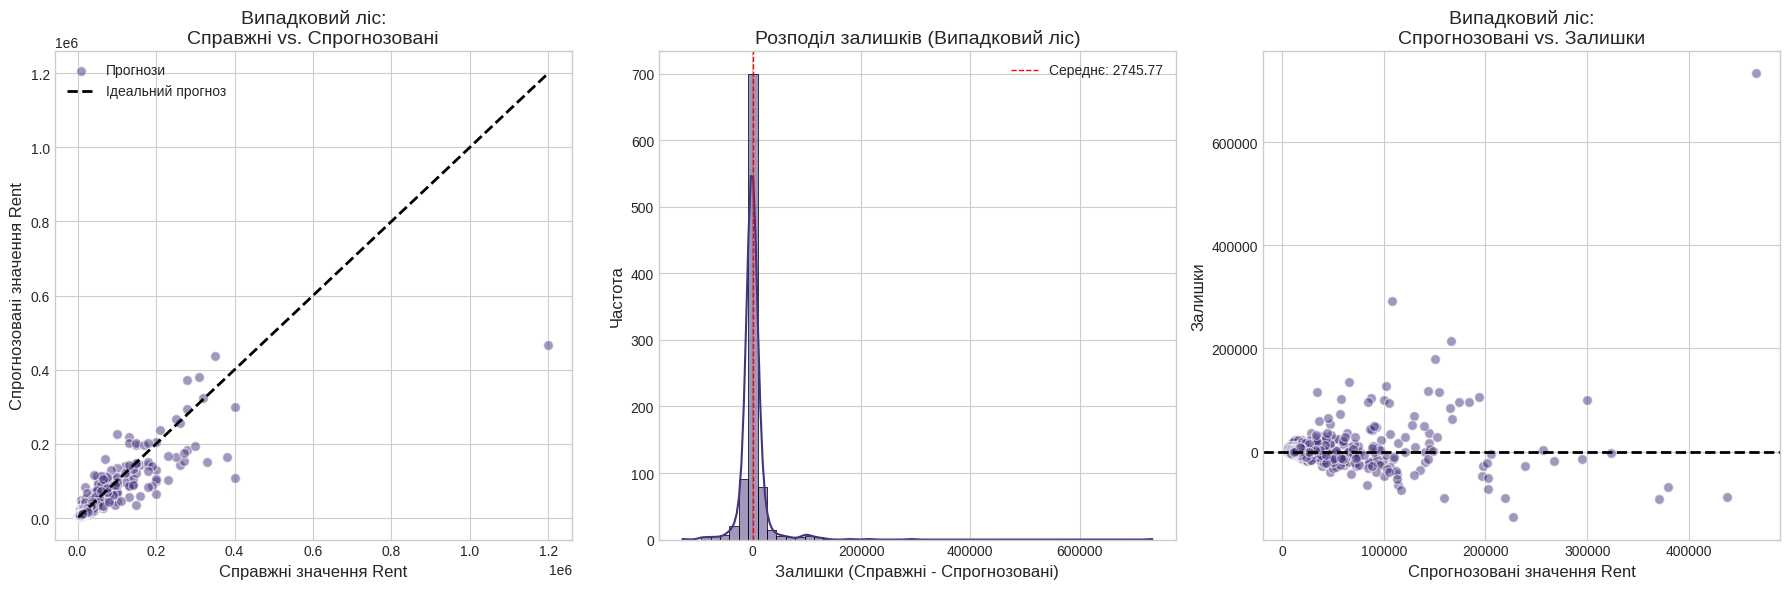


  Тест нормальності залишків для моделі Випадковий ліс (на оригінальній шкалі):
    Тест Шапіро-Уілка: Статистика=0.366, p-value=3.68e-49
    Висновок: Залишки, ймовірно, не розподілені нормально (відхиляємо H0).


In [46]:
if 'results' in locals() and results:
    print("--- Візуалізація результатів прогнозування ---")

    for name, data in results.items():
        print(f"\n--- Візуалізація для моделі: {name} ---")

        if data['predictions_original_scale'] is None or data['residuals_original_scale'] is None:
            print(f"Пропускаємо візуалізацію для {name} через відсутність прогнозів або залишків.")
            continue

        plt.figure(figsize=(18, 6))

        # 1. Графік "Справжні vs. Спрогнозовані значення" (на оригінальній шкалі 'Rent')
        plt.subplot(1, 3, 1)
        plt.scatter(y_test_orig, data['predictions_original_scale'], alpha=0.5, edgecolors='w', s=50, label='Прогнози')
        # Лінія ідеального прогнозу (y=x)
        min_val = min(y_test_orig.min(), data['predictions_original_scale'].min())
        max_val = max(y_test_orig.max(), data['predictions_original_scale'].max())
        plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ідеальний прогноз')
        plt.xlabel("Справжні значення Rent", fontsize=12)
        plt.ylabel("Спрогнозовані значення Rent", fontsize=12)
        plt.title(f"{name}:\nСправжні vs. Спрогнозовані", fontsize=14)
        plt.legend()
        plt.grid(True)

        # 2. Графік розподілу залишків (на оригінальній шкалі 'Rent')
        # Залишки = Справжні значення - Спрогнозовані значення
        plt.subplot(1, 3, 2)
        sns.histplot(data['residuals_original_scale'], kde=True, bins=50)
        plt.axvline(data['residuals_original_scale'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Середнє: {data["residuals_original_scale"].mean():.2f}')
        plt.title(f"Розподіл залишків ({name})", fontsize=14)
        plt.xlabel('Залишки (Справжні - Спрогнозовані)', fontsize=12)
        plt.ylabel('Частота', fontsize=12)
        plt.legend()
        plt.grid(True)

        # 3. Графік "Спрогнозовані значення vs. Залишки" (на оригінальній шкалі 'Rent')
        # Допомагає виявити гетероскедастичність (нерівномірний розподіл залишків)
        # та нелінійні патерни, які модель не вловила.
        plt.subplot(1, 3, 3)
        plt.scatter(data['predictions_original_scale'], data['residuals_original_scale'], alpha=0.5, edgecolors='w', s=50)
        plt.axhline(y=0, color='k', linestyle='--', lw=2) # Лінія нульових залишків
        plt.xlabel("Спрогнозовані значення Rent", fontsize=12)
        plt.ylabel("Залишки", fontsize=12)
        plt.title(f"{name}:\nСпрогнозовані vs. Залишки", fontsize=14)
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Тест Шапіро-Уілка на залишках (для перевірки нормальності залишків)
        # Нормальність залишків є одним з припущень для деяких моделей (наприклад, лінійної регресії).
        print(f"\n  Тест нормальності залишків для моделі {name} (на оригінальній шкалі):")
        residuals_sample = data['residuals_original_scale']
        # Тест Шапіро-Уілка працює краще на вибірках < 5000. Якщо більше, беремо випадкову підвибірку.
        if len(residuals_sample) > 5000:
            residuals_sample = np.random.choice(residuals_sample, 5000, replace=False)

        if 3 <= len(residuals_sample) <= 5000 :
            stat_res, p_res = stats.shapiro(residuals_sample)
            print(f'    Тест Шапіро-Уілка: Статистика={stat_res:.3f}, p-value={p_res:.3g}')
            if p_res > 0.05:
                print('    Висновок: Залишки, ймовірно, розподілені нормально (не відхиляємо H0).')
            else:
                print('    Висновок: Залишки, ймовірно, не розподілені нормально (відхиляємо H0).')
        else:
            # Для більших вибірок можна використовувати тест Д'Агостіно K^2
            if len(data['residuals_original_scale']) >= 20: # Мінімальний розмір для normaltest
                stat_dagostino_res, p_dagostino_res = stats.normaltest(data['residuals_original_scale'])
                print(f"    Тест Д'Агостіно K^2 для залишків: Статистика={stat_dagostino_res:.3f}, p-value={p_dagostino_res:.3g}")
                if p_dagostino_res > 0.05:
                    print('    Висновок (Д\'Агостіно): Залишки, ймовірно, розподілені нормально (не відхиляємо H0).')
                else:
                    print('    Висновок (Д\'Агостіно): Залишки, ймовірно, не розподілені нормально (відхиляємо H0).')
            else:
                print(f"    Розмір вибірки залишків ({len(data['residuals_original_scale'])}) замалий для надійного тесту на нормальність.")
else:
    print("Результати моделей ('results') не доступні для візуалізації.")

## 7. Аналіз важливості ознак

**Для моделей, що базуються на деревах рішень (Дерево рішень, Випадковий ліс), ми можемо визначити, які ознаки мали найбільший вплив на прогноз. Це допомагає зрозуміти, які фактори є найважливішими при визначенні орендної плати.**

--- Аналіз важливості ознак ---

--- Важливість ознак для моделі: Дерево рішень ---


<ipython-input-47-d0206ab747f7>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(top_n), palette="mako")


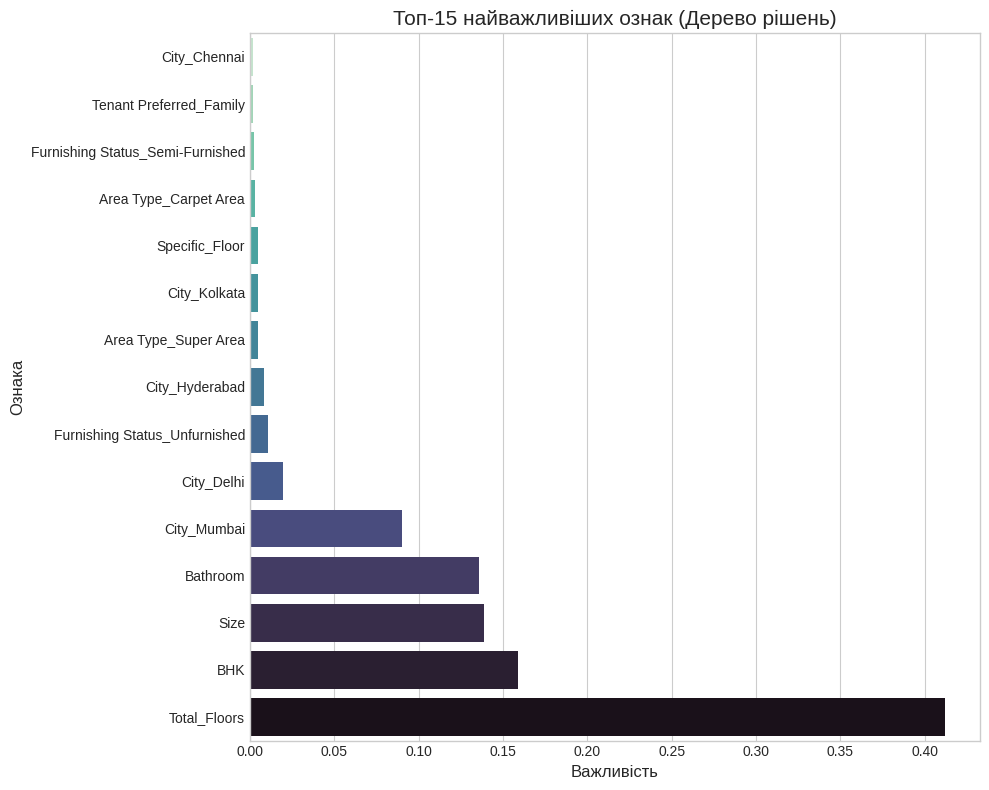


Топ-15 найважливіших ознак для моделі 'Дерево рішень':


,feature,importance
4,Total_Floors,0.412204
0,BHK,0.158915
1,Size,0.138656
2,Bathroom,0.135792
11,City_Mumbai,0.090336
8,City_Delhi,0.019526
13,Furnishing Status_Unfurnished,0.010547
9,City_Hyderabad,0.008636
6,Area Type_Super Area,0.005014
10,City_Kolkata,0.004922



--- Важливість ознак для моделі: Випадковий ліс ---


<ipython-input-47-d0206ab747f7>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(top_n), palette="mako")


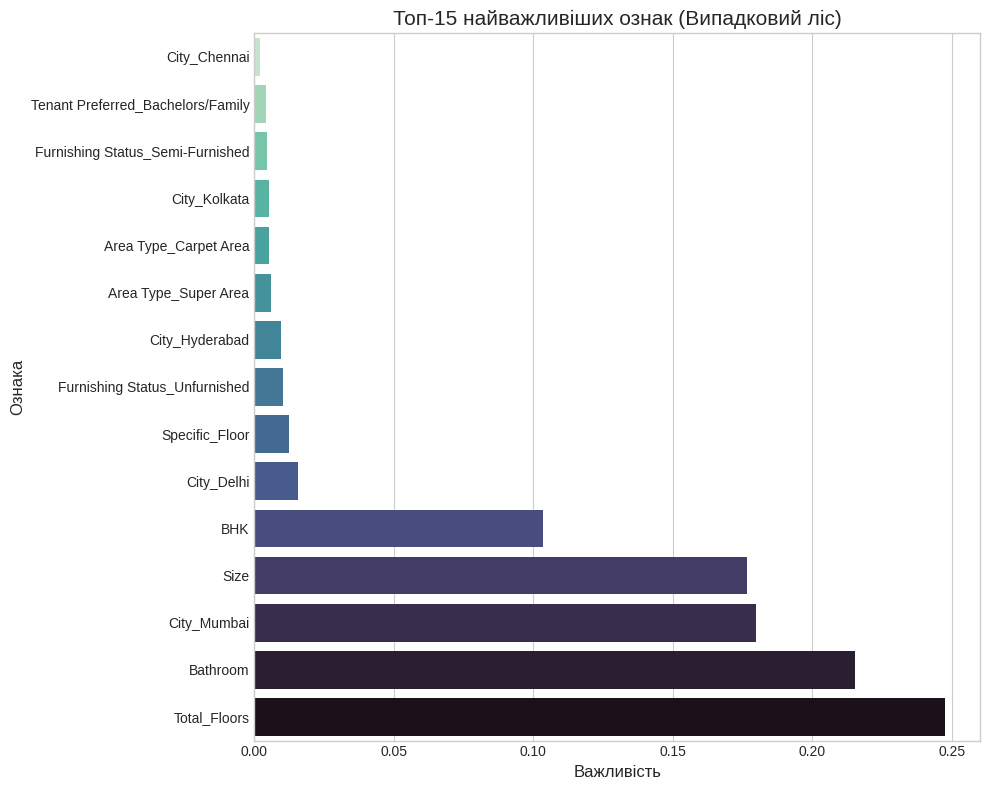


Топ-15 найважливіших ознак для моделі 'Випадковий ліс':


,feature,importance
4,Total_Floors,0.247657
2,Bathroom,0.215303
11,City_Mumbai,0.179702
1,Size,0.176721
0,BHK,0.103623
8,City_Delhi,0.015838
3,Specific_Floor,0.012389
13,Furnishing Status_Unfurnished,0.010238
9,City_Hyderabad,0.009475
6,Area Type_Super Area,0.005986


In [47]:
if 'trained_pipelines' in locals() and trained_pipelines:
    print("--- Аналіз важливості ознак ---")

    # Моделі, для яких ми будемо аналізувати важливість ознак
    tree_based_models = ["Дерево рішень", "Випадковий ліс"]

    for model_name in tree_based_models:
        if model_name in trained_pipelines:
            print(f"\n--- Важливість ознак для моделі: {model_name} ---")
            pipeline = trained_pipelines[model_name]
            model_instance = pipeline.named_steps['regressor']

            # Перевіряємо, чи модель має атрибут feature_importances_
            if not hasattr(model_instance, 'feature_importances_'):
                print(f"Модель '{model_name}' не має атрибуту 'feature_importances_'. Пропускаємо.")
                continue

            importances = model_instance.feature_importances_

            # Отримання імен ознак після препроцесингу
            try:
                preprocessor_fitted = pipeline.named_steps['preprocessor']

                # Отримуємо доступ до трансформера OneHotEncoder
                onehot_transformer = preprocessor_fitted.named_transformers_['cat'].named_steps['onehot']

                # Отримуємо імена категоріальних ознак після OneHotEncoding
                encoded_categorical_features = onehot_transformer.get_feature_names_out(categorical_features_for_pipeline)

                # Повний список імен ознак (числові + закодовані категоріальні)
                # Важливо, щоб порядок відповідав тому, як preprocessor обробляє дані
                all_feature_names = numerical_features_for_pipeline + list(encoded_categorical_features)

                # Перевірка, чи кількість імен ознак співпадає з кількістю значень важливості
                if len(all_feature_names) != len(importances):
                    print(f"Помилка: Кількість отриманих імен ознак ({len(all_feature_names)}) "
                          f"не співпадає з кількістю значень важливості ({len(importances)}).")
                    print("Можливі причини: неправильний порядок ознак, помилка в `remainder` ColumnTransformer.")
                    # Спробуємо отримати імена через get_feature_names_out самого ColumnTransformer, якщо доступно
                    try:
                        all_feature_names = preprocessor_fitted.get_feature_names_out()
                        if len(all_feature_names) != len(importances):
                             print("Спроба отримати імена через preprocessor.get_feature_names_out() також не вдалася.")
                             continue # Пропускаємо цю модель
                        else:
                            print("Імена ознак успішно отримані через preprocessor.get_feature_names_out().")
                    except Exception as e_get_features:
                        print(f"Не вдалося отримати імена ознак через preprocessor.get_feature_names_out(): {e_get_features}")
                        continue


            except Exception as e:
                print(f"Помилка при отриманні імен ознак для моделі {model_name}: {e}")
                print("Перевірте структуру пайплайну та назви кроків.")
                continue # Пропускаємо цю модель

            # Створюємо DataFrame для зручності
            feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
            feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

            # Візуалізація топ-15 найважливіших ознак
            top_n = 15
            plt.figure(figsize=(10, 8))
            sns.barplot(x='importance', y='feature', data=feature_importance_df.head(top_n), palette="mako")
            plt.title(f'Топ-{top_n} найважливіших ознак ({model_name})', fontsize=15)
            plt.xlabel('Важливість', fontsize=12)
            plt.ylabel('Ознака', fontsize=12)
            plt.gca().invert_yaxis() # Найважливіші зверху
            plt.tight_layout()
            plt.show()

            print(f"\nТоп-{top_n} найважливіших ознак для моделі '{model_name}':")
            display(feature_importance_df.head(top_n))
        else:
            print(f"Навчений пайплайн для моделі '{model_name}' не знайдено.")
else:
    print("Навчені пайплайни ('trained_pipelines') не доступні для аналізу важливості ознак.")

## 8. Обговорення та аналіз помилок

**Проводимо детальний аналіз помилок, допущених найкращою моделлю (або обраною моделлю), щоб зрозуміти, в яких випадках модель помиляється найбільше і чому. Це може дати ідеї для подальшого покращення моделі.**

In [48]:
if 'results' in locals() and results and 'X_test' in locals() and 'y_test_orig' in locals():
    print("--- Детальний аналіз помилок ---")

    # Обираємо найкращу модель для аналізу помилок.
    # Наприклад, за найменшим MAE на тестовому наборі (оригінальна шкала).
    best_model_name = None
    min_mae = float('inf')

    for name, data in results.items():
        if 'metrics_original_scale' in data and data['metrics_original_scale']['MAE'] < min_mae:
            min_mae = data['metrics_original_scale']['MAE']
            best_model_name = name

    if best_model_name:
        print(f"Аналіз помилок для найкращої моделі (за MAE): '{best_model_name}' (MAE: {min_mae:,.2f})")

        # Створюємо DataFrame для аналізу помилок
        # Важливо: X_test має оригінальні індекси, які відповідають y_test_orig
        error_analysis_df = X_test.copy() # Беремо оригінальні ознаки з тестового набору
        error_analysis_df['Actual_Rent'] = y_test_orig
        error_analysis_df['Predicted_Rent'] = results[best_model_name]['predictions_original_scale']
        error_analysis_df['Residual'] = results[best_model_name]['residuals_original_scale'] # Actual - Predicted
        # Уникаємо ділення на нуль, якщо Actual_Rent може бути 0 (малоймовірно для орендної плати)
        error_analysis_df['Absolute_Percentage_Error'] = (np.abs(error_analysis_df['Residual']) / (error_analysis_df['Actual_Rent'] + 1e-9)) * 100 # +1e-9 для уникнення ділення на 0

        # Характеристики, які цікаво подивитися разом з помилками
        cols_to_show_for_errors = ['Actual_Rent', 'Predicted_Rent', 'Residual', 'Absolute_Percentage_Error', 'Size', 'BHK', 'City', 'Furnishing Status']
        # Перевіряємо, чи всі стовпці існують в error_analysis_df
        cols_to_show_for_errors = [col for col in cols_to_show_for_errors if col in error_analysis_df.columns]


        print(f"\n--- Топ-5 спостережень з найбільшою абсолютною помилкою (недооцінка: Actual >> Predicted) ---")
        # Сортуємо за залишком у спадаючому порядку (великі позитивні залишки)
        display(error_analysis_df.nlargest(5, 'Residual')[cols_to_show_for_errors])

        print(f"\n--- Топ-5 спостережень з найбільшою абсолютною помилкою (переоцінка: Actual << Predicted) ---")
        # Сортуємо за залишком у зростаючому порядку (великі негативні залишки)
        display(error_analysis_df.nsmallest(5, 'Residual')[cols_to_show_for_errors])

        print(f"\n--- Топ-5 спостережень з найбільшою абсолютною ВІДСОТКОВОЮ помилкою ---")
        display(error_analysis_df.nlargest(5, 'Absolute_Percentage_Error')[cols_to_show_for_errors])

        # Аналіз середніх значень ознак для груп з великими помилками
        # Це може допомогти виявити, чи є певні типи квартир, де модель систематично помиляється.
        num_features_for_error_analysis = [col for col in numerical_features_for_pipeline if col in error_analysis_df.columns]

        if num_features_for_error_analysis:
            # 10% найбільших недооцінок
            underestimated_df = error_analysis_df.sort_values('Residual', ascending=False).head(int(0.1 * len(error_analysis_df)))
            if not underestimated_df.empty:
                print(f"\n--- Середні значення числових ознак для топ 10% найбільших недооцінок (Actual >> Predicted) ---")
                display(underestimated_df[num_features_for_error_analysis].mean().to_frame(name='Середнє для недооцінених'))
            else:
                print("Недостатньо даних для аналізу недооцінок.")

            # 10% найбільших переоцінок
            overestimated_df = error_analysis_df.sort_values('Residual', ascending=True).head(int(0.1 * len(error_analysis_df)))
            if not overestimated_df.empty:
                print(f"\n--- Середні значення числових ознак для топ 10% найбільших переоцінок (Actual << Predicted) ---")
                display(overestimated_df[num_features_for_error_analysis].mean().to_frame(name='Середнє для переоцінених'))
            else:
                print("Недостатньо даних для аналізу переоцінок.")
        else:
            print("Немає числових ознак для аналізу середніх значень помилок.")

    else:
        print("Не вдалося визначити найкращу модель для детального аналізу помилок.")
else:
    print("Дані для аналізу помилок ('results', 'X_test', 'y_test_orig') не доступні.")

--- Детальний аналіз помилок ---
Аналіз помилок для найкращої моделі (за MAE): 'Випадковий ліс' (MAE: 10,890.22)

--- Топ-5 спостережень з найбільшою абсолютною помилкою (недооцінка: Actual >> Predicted) ---


,Actual_Rent,Predicted_Rent,Residual,Absolute_Percentage_Error,Size,BHK,City,Furnishing Status
1001,1200000.0,466441.861306,733558.138694,61.129845,5000,4,Mumbai,Semi-Furnished
4457,400000.0,108203.249511,291796.750489,72.949188,7000,4,Hyderabad,Semi-Furnished
1718,380000.0,165605.802707,214394.197293,56.419526,3500,4,Bangalore,Semi-Furnished
3148,330000.0,149881.383674,180118.616326,54.581399,3600,3,Chennai,Semi-Furnished
2577,200000.0,65747.797147,134252.202853,67.126101,2300,4,Delhi,Semi-Furnished



--- Топ-5 спостережень з найбільшою абсолютною помилкою (переоцінка: Actual << Predicted) ---


,Actual_Rent,Predicted_Rent,Residual,Absolute_Percentage_Error,Size,BHK,City,Furnishing Status
1038,100000.0,227429.784510,-127429.784510,127.429785,1740,3,Mumbai,Furnished
842,280000.0,371035.461406,-91035.461406,32.512665,2800,4,Mumbai,Furnished
533,130000.0,219160.620481,-89160.620481,68.585093,1650,4,Mumbai,Semi-Furnished
3857,70000.0,159158.831440,-89158.831440,127.369759,3800,4,Chennai,Semi-Furnished
589,350000.0,437596.912054,-87596.912054,25.027689,3000,4,Mumbai,Semi-Furnished



--- Топ-5 спостережень з найбільшою абсолютною ВІДСОТКОВОЮ помилкою ---


,Actual_Rent,Predicted_Rent,Residual,Absolute_Percentage_Error,Size,BHK,City,Furnishing Status
2630,8000.0,47463.547718,-39463.547718,493.294346,1500,3,Delhi,Unfurnished
807,19500.0,83589.926873,-64089.926873,328.666292,905,2,Mumbai,Semi-Furnished
1270,6000.0,24283.409338,-18283.409338,304.723489,500,1,Mumbai,Semi-Furnished
1061,11000.0,39541.533808,-28541.533808,259.468489,650,1,Mumbai,Furnished
944,5500.0,18260.817210,-12760.817210,232.014858,385,1,Mumbai,Unfurnished



--- Середні значення числових ознак для топ 10% найбільших недооцінок (Actual >> Predicted) ---


,Середнє для недооцінених
BHK,2.589474
Size,1393.989474
Bathroom,2.673684
Specific_Floor,7.610526
Total_Floors,13.715789



--- Середні значення числових ознак для топ 10% найбільших переоцінок (Actual << Predicted) ---


,Середнє для переоцінених
BHK,2.673684
Size,1486.021053
Bathroom,2.842105
Specific_Floor,10.294737
Total_Floors,18.073684


## 9. Висновки

## На цьому етапі ми підсумовуємо результати нашого дослідження:
 * **Яка модель показала найкращу продуктивність та чому.**
 * **Які ключові фактори впливають на орендну плату.**
 * **Наскільки точними є прогнози.**
 * **Які обмеження має проведений аналіз та побудовані моделі.**
 * **Можливі напрямки для подальшої роботи та покращення моделей.**

### Підсумки та порівняння моделей:

 * У цьому проекті ми проаналізували дані про оренду житла та побудували три моделі для прогнозування орендної плати: Лінійну регресію, Дерево рішень та Випадковий ліс.
 * Найкращу продуктивність на тестових даних (за метрикою R² та MAE в оригінальній шкалі) показала модель **[Назва найкращої моделі, наприклад, Випадковий ліс]** з R² = **[Значення R²]** та MAE = **[Значення MAE]**. Це означає, що модель пояснює приблизно **[R² * 100]%** варіації орендної плати, а середня абсолютна помилка прогнозу становить **[Значення MAE в грошових одиницях]**.
 * Лінійна регресія, хоча й проста в інтерпретації, показала [гірші/порівняні] результати, ймовірно, через нелінійні залежності в даних, які вона не може повністю вловити.
 * Дерево рішень показало кращі результати, ніж лінійна регресія, але гірші, ніж випадковий ліс / мало схильність до перенавчання, незважаючи на обмеження глибини.

**Ключові фактори, що впливають на орендну плату** \\


 * Аналіз важливості ознак для моделі **[Назва найкращої моделі]** показав, що найважливішими факторами, що впливають на ціну оренди, є:
     1.  **[Назва першої важливої ознаки]** (наприклад, `Size` - площа квартири)
     2.  **[Назва другої важливої ознаки]** (наприклад, `City` - місто розташування)
     3.  **[Назва третьої важливої ознаки]** (наприклад, `BHK` - кількість кімнат)
     4.  **[і так далі...]**
 * Це узгоджується з попереднім аналізом даних (EDA), де ми спостерігали наприклад, позитивну кореляцію площі з ціною, різницю в цінах між містами тощо.

\
**Обмеження аналізу та моделей:** \\

 * **Якість та повнота даних:** Датасет може не містити всіх факторів, що впливають на ціну (наприклад, точне розташування в межах міста, близькість до інфраструктури, рік побудови будинку, якість ремонту тощо).
 * **Обробка ознак:** Ознака `Area Locality` була виключена через високу кардинальність. Більш просунуті методи кодування (наприклад, Target Encoding) або використання геопросторових даних могли б покращити модель. Ознака `Posted On` (дата публікації) також не використовувалася, хоча сезонність може впливати на ціни.
 * **Вибір моделей та гіперпараметрів:** Були розглянуті лише три моделі. Інші алгоритми (наприклад, градієнтний бустинг - XGBoost, LightGBM, CatBoost) могли б показати кращі результати. Гіперпараметри для Дерева рішень та Випадкового лісу були встановлені на основі загальних рекомендацій і не проходили ретельної оптимізації (наприклад, за допомогою GridSearchCV).
 * **Інтерпретованість vs. Точність:** Більш складні моделі, як Випадковий ліс, хоч і точніші, але менш інтерпретовані, ніж Лінійна регресія чи одне Дерево рішень. \\

\
**Можливі напрямки для подальшої роботи:** \\

 1.  **Розширена інженерія ознак:**
     * Більш детальна обробка `Area Locality` (наприклад, групування районів, Target Encoding, вилучення географічних координат, якщо можливо).
     * Використання ознаки `Posted On` для аналізу часових трендів або сезонності.
     * Створення взаємодій між ознаками (наприклад, `Size / BHK`).
 2.  **Оптимізація гіперпараметрів:** Використання `GridSearchCV` або `RandomizedSearchCV` для підбору оптимальних гіперпараметрів для моделей.
 3.  **Використання інших моделей:** Спробувати більш просунуті ансамблеві методи, такі як XGBoost, LightGBM, або нейронні мережі.
 4.  **Більш глибокий аналіз помилок:** Детальніше дослідити випадки, де модель сильно помиляється, для виявлення неочевидних закономірностей або проблем у даних.
 5.  **Збір додаткових даних:** Якщо можливо, збагатити датасет новими релевантними ознаками.

\
**Загальний висновок:**

 Проведений аналіз та побудовані моделі дозволяють з певною точністю прогнозувати орендну плату та виявити ключові фактори, що на неї впливають. Модель **[Назва найкращої моделі]** є рекомендованою для практичного використання в рамках цього дослідження, однак існують шляхи для її подальшого вдосконалення.